In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('nifty_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average
0,2019-10-04 00:00:00+05:30,11388.450195,11400.299805,11158.349609,11174.750000,928500,0.0,0.0,25250.1,26277.35,18837.85,25033.871,23118.842
1,2019-10-07 00:00:00+05:30,11196.200195,11233.849609,11112.650391,11126.400391,733200,0.0,0.0,25250.1,26277.35,18837.85,25033.871,23118.842
2,2019-10-09 00:00:00+05:30,11152.950195,11321.599609,11090.150391,11313.299805,741100,0.0,0.0,25250.1,26277.35,18837.85,25033.871,23118.842
3,2019-10-10 00:00:00+05:30,11280.500000,11293.349609,11208.549805,11234.549805,562000,0.0,0.0,25250.1,26277.35,18837.85,25033.871,23118.842
4,2019-10-11 00:00:00+05:30,11257.700195,11362.900391,11189.400391,11305.049805,737800,0.0,0.0,25250.1,26277.35,18837.85,25033.871,23118.842


In [4]:
df = df.drop(columns = ['Dividends', 'Stock Splits'])
df.head()

,Date,Open,High,Low,Close,Volume,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average
0,2019-10-04 00:00:00+05:30,11388.450195,11400.299805,11158.349609,11174.750000,928500,25250.1,26277.35,18837.85,25033.871,23118.842
1,2019-10-07 00:00:00+05:30,11196.200195,11233.849609,11112.650391,11126.400391,733200,25250.1,26277.35,18837.85,25033.871,23118.842
2,2019-10-09 00:00:00+05:30,11152.950195,11321.599609,11090.150391,11313.299805,741100,25250.1,26277.35,18837.85,25033.871,23118.842
3,2019-10-10 00:00:00+05:30,11280.500000,11293.349609,11208.549805,11234.549805,562000,25250.1,26277.35,18837.85,25033.871,23118.842
4,2019-10-11 00:00:00+05:30,11257.700195,11362.900391,11189.400391,11305.049805,737800,25250.1,26277.35,18837.85,25033.871,23118.842


In [5]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Previous Close     0
52-Week High       0
52-Week Low        0
50-Day Average     0
200-Day Average    0
dtype: int64

In [6]:
open = df['Open']
high = df['High']
low = df['Low']
close = df['Close']
volume = df['Volume']
prevclose = df['Previous Close']
ftwh = df['52-Week High']
ftwl = df['52-Week Low']
favg = df['50-Day Average']
tavg = df['200-Day Average']


open = np.array(open).reshape(-1, 1)
high = np.array(high).reshape(-1, 1)
low = np.array(low).reshape(-1, 1)
close = np.array(close).reshape(-1, 1)
volume = np.array(volume).reshape(-1, 1)
prevclose = np.array(prevclose).reshape(-1, 1)
ftwh = np.array(ftwh).reshape(-1, 1)
ftwl = np.array(ftwl).reshape(-1, 1)
favg = np.array(favg).reshape(-1, 1)
tavg = np.array(tavg).reshape(-1, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

open = scaler.fit_transform(open)
high = scaler.fit_transform(high)
low = scaler.fit_transform(low)
close = scaler.fit_transform(close)
volume = scaler.fit_transform(volume)
prevclose = scaler.fit_transform(prevclose)
ftwh = scaler.fit_transform(ftwh)
ftwl = scaler.fit_transform(ftwl)
favg = scaler.fit_transform(favg)
tavg = scaler.fit_transform(tavg)

In [8]:
concatenated_cols = np.concatenate((open, high, low, close, volume, prevclose, ftwh, ftwl, favg, tavg), axis =1)
x_data = []
y_data = []
sequences = 5
for i in range(sequences, len(concatenated_cols)):
    x_data.append(concatenated_cols[i-sequences:i])
    y_data.append(close[i])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train

array([[[0.19733596, 0.18439013, 0.19566474, ..., 0.        ,
         0.        , 0.        ],
        [0.18695142, 0.17526477, 0.1932131 , ..., 0.        ,
         0.        , 0.        ],
        [0.18461523, 0.18007552, 0.19200604, ..., 0.        ,
         0.        , 0.        ],
        [0.19150494, 0.17852676, 0.19835784, ..., 0.        ,
         0.        , 0.        ],
        [0.19027339, 0.18233977, 0.19733053, ..., 0.        ,
         0.        , 0.        ]],

       [[0.18695142, 0.17526477, 0.1932131 , ..., 0.        ,
         0.        , 0.        ],
        [0.18461523, 0.18007552, 0.19200604, ..., 0.        ,
         0.        , 0.        ],
        [0.19150494, 0.17852676, 0.19835784, ..., 0.        ,
         0.        , 0.        ],
        [0.19027339, 0.18233977, 0.19733053, ..., 0.        ,
         0.        , 0.        ],
        [0.19449744, 0.18549484, 0.20273009, ..., 0.        ,
         0.        , 0.        ]],

       [[0.18461523, 0.18007552, 0.1

In [10]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout


sequential = Sequential()
sequential.add(GRU(units = 100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
sequential.add(Dropout(0.2))
sequential.add(GRU(units = 100, return_sequences=False))
sequential.add(Dropout(0.2))
sequential.add(Dense(1))
sequential.compile(optimizer='adam', loss='mean_squared_error')

sequential.fit(x_train, y_train, epochs=100, batch_size = 32)

C:\Anaconda3\envs\jupyter_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0584
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [11]:
from sklearn.metrics import mean_squared_error

pred = sequential.predict(x_test)
mean_squared_error(y_test, pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


0.0001880745113043501

In [12]:
y_test_scaled = y_test.reshape(-1, 1)
pred_scaled = pred.reshape(-1, 1)

y_test_original = scaler.inverse_transform(y_test_scaled)
pred_original = scaler.inverse_transform(pred_scaled)

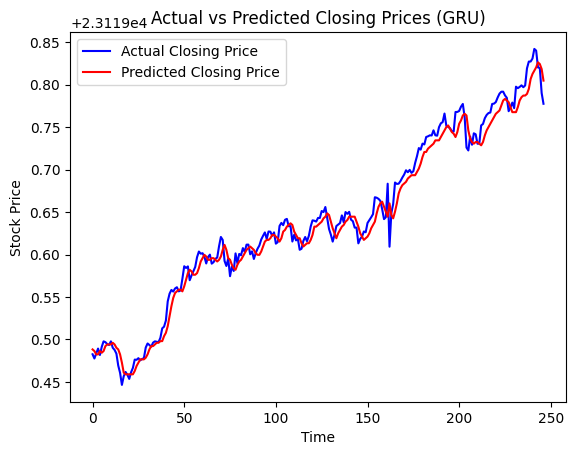

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_test_original, color='blue', label='Actual Closing Price')
plt.plot(pred_original, color='red', label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices (GRU)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [14]:
sequential.save('gru_stock_prediction.keras')